In [1]:
# все нужные библиотеки
# можете дополнить список если считаете нужным
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

import plotly.graph_objs as go
import matplotlib.pyplot as plt



In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Проект:
Заказчик передал вам данные: суммы транзакции клиентов и какие-то признаки<br>
Все данные хранятся в файле train_dataset.csv, где суммы транзакций размещены под колонкой "int_target". Как вы уже догадались это и будет таргет который нам нужно будет предсказать.<br>
Не терпится начать? Мне тоже, но для начала вводная касательно этого проекта, тоже будет интересно.

Хотя перед вами стоит одна задача весь проект будет поделён на несколько подпунктов для вашего удобства.<br>
Каждый из подпунктов будет просить вас выполнить какое-то задание, но как вы его выполните будет зависеть только от вас. Ведь как вы уже
убедились в дата-саинсе, да и в целом питоне много разных подходов для одной проблемы.<br>

В целом вы можете написать полностью свой код, главное в итоге построить модель. А убедиться в том что ваша модель хороша нам поможет Kaggle.<br>
Да-да, в этом проекте вы сможете сдать свои результаты в Kaggle и получить свой балл.<br>
Ну, а теперь пора начинать

1) Для начала импортируйте данные из файла dataset.csv, назовите ваш датасет "dataset"

In [23]:
dataset = pd.read_csv('train_dataset.csv')

  2. Сделайте предварительный анализ посмотрите на ваши данные:
сколько их, какого они типа, и какое их примерно распределение

In [4]:
dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,0.001888,2.555947,-64.208613,0.470329,...,B,83.317907,85.385030,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108,17353
1,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,2.359228,0.571917,-110.318854,-2.620978,...,D,114.881621,79.711086,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654,1214
2,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,133.811870,1.160380,-206.238816,-1.006502,...,B,145.833459,115.159171,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599,16094
3,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,85.009772,-1.401234,92.624296,2.712139,...,C,98.150579,78.620349,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346,24168
4,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,9.153251,-0.157479,-175.895074,-0.832795,...,C,94.519135,123.286154,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328,1105


In [5]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9.892699,0.051539,13.691801,-5.280291,-0.190470,33.328407,353.997548,0.322612,-69.936887,-0.334325,0.328602,99.738087,99.862703,99.764452,99.958384,100.053203,100.209235,100.150711,99.819907,14962.016000
std,16.005016,0.708241,77.058634,26.814772,0.966878,193.282240,482.976481,1.928390,130.805512,1.802465,1.949699,19.970516,20.059934,19.816391,20.073887,20.005191,19.839667,20.084744,20.072153,8507.039575
min,-55.674815,-1.000000,0.002306,-90.266818,-1.000000,-782.730110,0.000032,-8.785694,-562.750841,-6.678488,-6.817115,23.296434,21.404151,20.462943,31.695377,25.278459,6.108243,29.523073,28.591199,501.000000
25%,-0.590266,-0.652740,0.891789,-24.131903,-1.000000,-88.607265,38.261808,-0.867972,-155.988559,-1.569338,-0.997933,86.416262,86.377084,86.184816,86.146061,86.513425,86.753705,86.684625,86.163540,7461.750000
50%,10.032527,0.108589,2.771781,-6.535842,-0.999996,47.154805,169.202144,0.454511,-80.249681,-0.374527,0.361400,99.753333,99.914720,99.938163,99.956294,99.644334,100.166669,100.179503,99.942090,14878.500000
75%,20.577624,0.750147,8.313018,12.151035,1.000000,165.882796,476.800547,1.636826,10.046369,0.874218,1.690059,113.192601,113.550065,113.274773,113.503300,113.486201,113.389489,113.657307,113.275163,22404.000000
max,71.408515,1.000000,4195.458665,96.967006,1.000000,689.183091,5099.175987,7.563691,454.622574,6.605742,7.314190,169.972815,169.211534,176.896232,180.756967,182.022092,173.917343,171.521586,178.220128,29631.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   9000 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   9000 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   feature_9   9000 non-null   float64
 9   feature_10  9000 non-null   float64
 10  feature_11  9000 non-null   float64
 11  feature_12  9000 non-null   object 
 12  feature_13  9000 non-null   float64
 13  feature_14  9000 non-null   float64
 14  feature_15  9000 non-null   float64
 15  feature_16  9000 non-null   float64
 16  feature_17  9000 non-null   float64
 17  feature_18  9000 non-null   float64
 18  feature_19  9000 non-null   float64
 19  feature_20  9000 non-null  

In [7]:
dataset.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
int_target    0
dtype: int64

In [24]:
dataset['feature_12'].value_counts()

feature_12
B    2288
C    2265
D    2230
A    2217
Name: count, dtype: int64

3. Разделите ваш датасет на таргет и признаки, а также поделите ваш датасет на тренировочный и тестовый

In [25]:
X = dataset.drop('int_target', axis=1)
y = dataset['int_target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

4. Надеюсь вы заметили что у вас есть категориальный признак который имеет текстовый формат.<br>
Переведите этот признак в числовое значение

In [27]:
ohe = OneHotEncoder()
x_dummy = pd.DataFrame(X['feature_12'])
x_dummy

,feature_12
0,B
1,D
2,B
3,C
4,C
...,...
8995,D
8996,D
8997,B
8998,D


In [28]:
ohe.fit(x_dummy)

OneHotEncoder()

In [29]:
new_features = ohe.transform(x_dummy).toarray()
new_features

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [30]:
new_features = pd.DataFrame(new_features, columns = ohe.categories_[0])
new_dataset = pd.concat([new_features, X], axis = 1)
new_dataset = new_dataset.drop(columns=['feature_12'])
X = new_dataset

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 105)

5. Надеюсь вы заметили что масштабы наших признаков сильно разнятся.<br>
Давайте применим одно единое масштабирование на все наши признаки.

In [32]:
scaler = MinMaxScaler()
x_train_scaled_data = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled_data, columns=x_train.columns)

x_test_scaled_data = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled_data, columns=x_test.columns)


6. Постройте модель линейной регрессии.<br>
Оцените модель с помощью метрики RMSE, а также покажите статистические метрики

In [33]:
lin_model = LinearRegression()
lin_model.fit(x_train_scaled, y_train)

LinearRegression()

In [34]:
linear_prediction = lin_model.predict(x_test_scaled)
rmse = MSE(y_test, linear_prediction) ** (1/2)
rmse

6760.135416770784

In [35]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9.892699,0.051539,13.691801,-5.280291,-0.190470,33.328407,353.997548,0.322612,-69.936887,-0.334325,0.328602,99.738087,99.862703,99.764452,99.958384,100.053203,100.209235,100.150711,99.819907,14962.016000
std,16.005016,0.708241,77.058634,26.814772,0.966878,193.282240,482.976481,1.928390,130.805512,1.802465,1.949699,19.970516,20.059934,19.816391,20.073887,20.005191,19.839667,20.084744,20.072153,8507.039575
min,-55.674815,-1.000000,0.002306,-90.266818,-1.000000,-782.730110,0.000032,-8.785694,-562.750841,-6.678488,-6.817115,23.296434,21.404151,20.462943,31.695377,25.278459,6.108243,29.523073,28.591199,501.000000
25%,-0.590266,-0.652740,0.891789,-24.131903,-1.000000,-88.607265,38.261808,-0.867972,-155.988559,-1.569338,-0.997933,86.416262,86.377084,86.184816,86.146061,86.513425,86.753705,86.684625,86.163540,7461.750000
50%,10.032527,0.108589,2.771781,-6.535842,-0.999996,47.154805,169.202144,0.454511,-80.249681,-0.374527,0.361400,99.753333,99.914720,99.938163,99.956294,99.644334,100.166669,100.179503,99.942090,14878.500000
75%,20.577624,0.750147,8.313018,12.151035,1.000000,165.882796,476.800547,1.636826,10.046369,0.874218,1.690059,113.192601,113.550065,113.274773,113.503300,113.486201,113.389489,113.657307,113.275163,22404.000000
max,71.408515,1.000000,4195.458665,96.967006,1.000000,689.183091,5099.175987,7.563691,454.622574,6.605742,7.314190,169.972815,169.211534,176.896232,180.756967,182.022092,173.917343,171.521586,178.220128,29631.000000


### Апдейт задачи
Пришле заказчик и запросил текущий статус. Метрики RMSE ему сильно не понравились, около половины размаха всего таргета.<br>
Вы предпологаете, что задача регрессии слишком комплексна для текущего набора данных.<br>
Вы предложили, поделить таргет на классы, то есть не определять абсолютную сумму транзакций, а определять к какому классу этот клиент относится (высокодоходных, средний или низкодоходный).<br>
Заказчик показать как поделить на эти классы

7. Чтобы поделить таргет на классы давайте сначала посмотрим на распределение этого самого таргета

In [36]:
print(dataset['int_target'].describe())

count     9000.000000
mean     14962.016000
std       8507.039575
min        501.000000
25%       7461.750000
50%      14878.500000
75%      22404.000000
max      29631.000000
Name: int_target, dtype: float64


8. Думаю вы согласитесь что распределение выглядит равномерным то есть поделить мы можем на три равных класса.<br>
Для этого нам нужно посчитать соответствующие перцентили (33% и 67%)

In [37]:
percentile_33 = dataset['int_target'].quantile(0.33)
percentile_67 = dataset['int_target'].quantile(0.67)

In [38]:
print(f"33-й перцентиль: {percentile_33}")
print(f"67-й перцентиль: {percentile_67}")

33-й перцентиль: 9871.67
67-й перцентиль: 20120.66


9. Заказчик согласился на деление по классам по данным перцентире но предложил их округлить.<br>
Поэтому создайте новый таргет, по такой логике, все что ниже 10,000 это низкодоходный, а все что выше 20000 это высокодоходный, остальное соответсвенно средний класс

In [39]:
low_income = 10000
high_income = 20000

def new_target(x):
    if x < low_income:
        return 'Низкий доход'
    elif x > high_income:
        return 'Средний доход'
    else:
        return 'Высокий доход'

new_dataset['target_class'] = dataset['int_target'].apply(new_target)

In [40]:
print("\nДанные с новым таргетом:")
print(new_dataset)


Данные с новым таргетом:
        A    B    C    D  feature_1  feature_2  feature_3  feature_4  \
0     0.0  1.0  0.0  0.0  -0.043457  -0.027918   1.473594 -10.309556   
1     0.0  0.0  0.0  1.0  -1.535978   0.999851  23.019753  38.430092   
2     0.0  1.0  0.0  0.0  11.567708   0.608310   1.873323   6.412821   
3     0.0  0.0  1.0  0.0   9.220074   0.999864   5.041939 -12.692120   
4     0.0  0.0  1.0  0.0  -3.025434  -0.594711   5.912259 -14.922129   
...   ...  ...  ...  ...        ...        ...        ...        ...   
8995  0.0  0.0  0.0  1.0 -14.855160  -0.444750   5.014003   6.427379   
8996  0.0  0.0  0.0  1.0   3.978782  -0.977872   4.424409 -12.647104   
8997  0.0  1.0  0.0  0.0 -12.752882   0.877753   4.595519  -3.167490   
8998  0.0  0.0  0.0  1.0   5.848172  -0.113649  14.008038   9.070265   
8999  0.0  1.0  0.0  0.0  -0.587002  -0.084128  19.426709  13.118624   

      feature_5   feature_6  ...  feature_11  feature_13  feature_14  \
0     -1.000000  145.373247  ...    0

10. Давайте теперь построим модель логистической регрессии она будет служить нам бэйзлайном, а также фильтром признаков.<br>
Для этого постройте модель с Lasso регуляризацией и коефициентом регуляризации 0.01.<br>
Оцените модель используя метрику accuracy

In [41]:
x = new_dataset.drop(columns=['target_class'])
y = new_dataset['target_class']
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size = 0.3, random_state = 105)

In [42]:
y.value_counts(normalize=True)

target_class
Низкий доход     0.334778
Средний доход    0.334333
Высокий доход    0.330889
Name: proportion, dtype: float64

In [43]:
y_t.value_counts(normalize=True)

target_class
Низкий доход     0.337037
Высокий доход    0.333333
Средний доход    0.329630
Name: proportion, dtype: float64

In [44]:
scaler = MinMaxScaler()
x_tr_scaled_d = scaler.fit_transform(x_tr)
x_tr_scaled = pd.DataFrame(x_tr_scaled_d, columns = x_tr.columns)

x_t_scaled_d = scaler.transform(x_t)
x_t_scaled = pd.DataFrame(x_t_scaled_d, columns = x_t.columns)

In [45]:
x_tr_scaled.describe()

,A,B,C,D,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,...,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,0.243175,0.256032,0.251111,0.249683,0.508071,0.524313,0.003354,0.448969,0.401541,0.551288,...,0.477721,0.506463,0.536257,0.529546,0.512666,0.457497,0.478065,0.560092,0.496677,0.451567
std,0.429034,0.436474,0.433687,0.432864,0.128614,0.352391,0.020062,0.143607,0.482684,0.131940,...,0.136211,0.138113,0.139912,0.135804,0.136343,0.135646,0.128313,0.118977,0.140114,0.140429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.423623,0.181462,0.000214,0.346845,0.000000,0.466537,...,0.385611,0.413751,0.442364,0.439578,0.418218,0.364868,0.390813,0.478395,0.402155,0.354434
50%,0.000000,0.000000,0.000000,0.000000,0.508507,0.551328,0.000657,0.441701,0.000001,0.560757,...,0.474570,0.510611,0.537293,0.528964,0.514293,0.457850,0.476315,0.559525,0.495830,0.453699
75%,0.000000,1.000000,1.000000,0.000000,0.592708,0.872152,0.001977,0.543567,1.000000,0.641779,...,0.568819,0.601495,0.630422,0.622682,0.605148,0.547955,0.565646,0.638152,0.591299,0.546705
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
log_model = LogisticRegression(max_iter = 10000)

In [47]:
log_model.fit(x_tr_scaled, y_tr)

LogisticRegression(max_iter=10000)

In [48]:
lasso_model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

In [49]:
lasso_model.fit(x_tr_scaled, y_tr)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [50]:
y_pred = log_model.predict(x_t_scaled)

In [51]:
accuracy = accuracy_score(y_t, y_pred)
print(f"Accuracy модели: {accuracy:.4f}")

Accuracy модели: 0.7593


In [52]:
LassoModel = LogisticRegression(penalty = "l1", C = 100, solver='saga', max_iter = 10000)
LassoModel.fit(x_tr_scaled, y_tr)

LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='saga')

In [53]:
lasso_pred = LassoModel.predict(x_t_scaled)

In [54]:
accuracy_lasso = accuracy_score(y_t, lasso_pred)
accuracy_lasso

0.7674074074074074

In [55]:
print("Точность на масштабированных данных без l1:", accuracy)
print("Точность на масштабированных данных с l1:", accuracy_lasso)

Точность на масштабированных данных без l1: 0.7592592592592593
Точность на масштабированных данных с l1: 0.7674074074074074


11. Посмотрите какие получились коэффициенты признаков у нашей модели

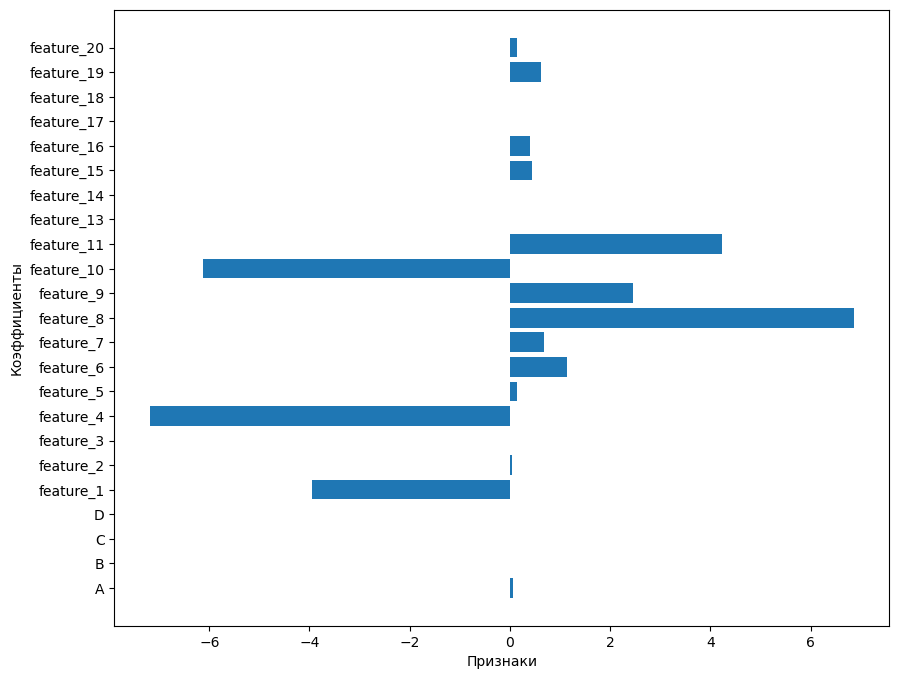

In [56]:
coefficients = LassoModel.coef_[0]

plt.figure(figsize=(10,8))
plt.barh(x.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.show()

12. Что ж видимо признаки у которых коэффициенты по всем классам равны нулю нам не особо полезны.<br>
Давайте выберем только те признаки у которых коэффициент не ноль и создадим новый датасет признаков

In [57]:
selected_features = x_tr_scaled.columns[coefficients != 0]
print(selected_features)

Index(['A', 'B', 'C', 'D', 'feature_1', 'feature_2', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20'],
      dtype='object')


In [58]:
x_tr_selected = pd.DataFrame(x_tr_scaled, columns=x_tr.columns)[selected_features]
x_t_selected = pd.DataFrame(x_t_scaled, columns=x_t.columns)[selected_features]
print(x_tr_selected.head())

     A    B    C    D  feature_1  feature_2  feature_4     feature_5  \
0  0.0  1.0  0.0  0.0   0.474885   0.999367   0.401955  4.767853e-13   
1  0.0  0.0  0.0  1.0   0.670151   0.720208   0.259697  0.000000e+00   
2  0.0  0.0  0.0  1.0   0.454739   0.003327   0.405273  1.636191e-12   
3  0.0  0.0  0.0  1.0   0.543222   0.800284   0.362265  0.000000e+00   
4  0.0  1.0  0.0  0.0   0.772026   0.082224   0.256440  0.000000e+00   

   feature_6  feature_7  ...  feature_10  feature_11  feature_13  feature_14  \
0   0.542375   0.006435  ...    0.501500    0.464561    0.782031    0.596870   
1   0.694100   0.178287  ...    0.652644    0.593721    0.491039    0.649114   
2   0.356880   0.002019  ...    0.286765    0.581423    0.731691    0.466859   
3   0.685352   0.039966  ...    0.652183    0.537772    0.728878    0.590132   
4   0.677815   0.360821  ...    0.340976    0.869779    0.710746    0.480353   

   feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  
0    0.668

13. Давайте посмотрим есть ли какая-то предсказательная способность у оставшихся признаков.<br>
Для этого примените principal component analysis и нарисуйте эти компоненты на графике с таргетом

In [59]:
import seaborn as sns
pca = PCA(n_components=2)
x_tr_pca = pca.fit_transform(x_tr_selected)
x_t_pca = pca.fit_transform(x_t_selected)

In [60]:
y_tr.shape

(6300,)

In [61]:
pca_df = pd.DataFrame(x_tr_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y_tr.values

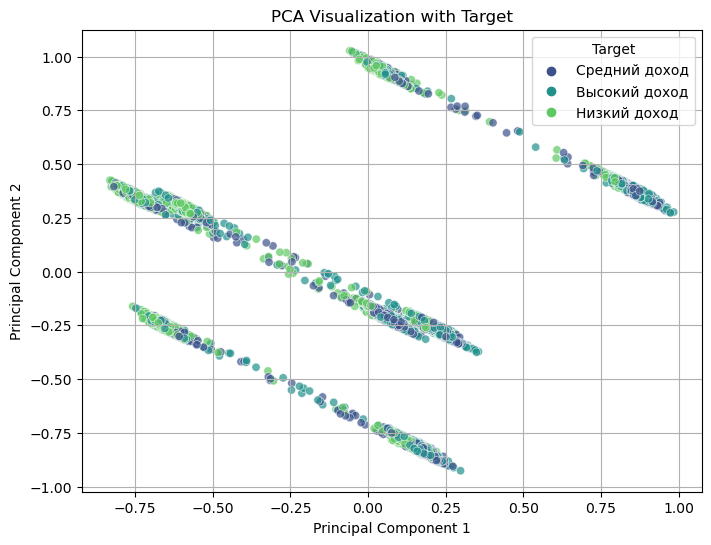

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='viridis', alpha=0.7)
plt.title('PCA Visualization with Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

14. Видимо что-то есть в этих признаках.<br>
Давайте теперь попробуем построить более комплексную модель, постройте любую модель основную на деревьях.<br>
Так же оцените вашу модель с помощью метрики accuracy

In [85]:
forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=7, max_features='sqrt')

In [86]:
forest_classifier.fit(x_tr_selected, y_tr)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [87]:
forest_classifier_pred = forest_classifier.predict(x_t_selected)
forest_classifier_pred

array(['Низкий доход', 'Высокий доход', 'Средний доход', ...,
       'Высокий доход', 'Средний доход', 'Высокий доход'], dtype=object)

In [88]:
accuracy = accuracy_score(y_t, forest_classifier_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.78


In [89]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(forest_classifier, x_tr, y_tr, cv=5, scoring='accuracy')

print(f'Cross-validated accuracy: {np.mean(cv_scores):.2f}')

Cross-validated accuracy: 0.79


In [92]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4, 10]
    }

In [93]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_tr_selected, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [94]:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [95]:
y_predict = grid_search.predict(x_t_selected)
accuracy = accuracy_score(y_t, y_predict)

print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.81


15. Давайте попробуем применить другой тип модели.<br>
Постройте SVM модель и оцените ее accuracy

In [115]:
svm_model = SVC(kernel='rbf', C=1)

In [116]:
svm_model.fit(x_tr_selected, y_tr)
svm_pred = svm_model.predict(x_t_selected)
accuracy = accuracy_score(y_t, svm_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.77


In [117]:
cv_scores1 = cross_val_score(svm_model, x_tr_selected, y_tr, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cv_scores1):.2f}')

Cross-validated accuracy: 0.77


15. Давайте попробуем применить другой тип модели.<br>
Постройте KNN модель и оцените ее accuracy

In [99]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_tr_selected, y_tr)

KNeighborsClassifier()

In [100]:
knn_pred = knn_classifier.predict(x_t_selected)
accuracy = accuracy_score(y_t, knn_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.69


In [109]:
params = {'n_neighbors': range(2, 21)}
knn_search_classifier = GridSearchCV(KNeighborsClassifier(), params, cv=3, scoring='accuracy')
knn_search_classifier.fit(x_tr_selected, y_tr)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)}, scoring='accuracy')

In [113]:
best_k = knn_search_classifier.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_tr_selected, y_tr)

KNeighborsClassifier(n_neighbors=20)

In [114]:
y_pred = knn.predict(x_t_selected)
accuracy = accuracy_score(y_t, y_pred)

print(f'Accuracy on the test set: {accuracy:.2f}')

Accuracy on the test set: 0.71


### Отправляем работы
Ну чтож думаю вы попробовали разные модели, надеюсь вы находили лучшие гиперпараметры, ведь пора соревноваться в результатах.<br>
Для этого вам нужно скачать 'test_dataset.csv'<br>
Применить все преобразования что вы делали на стадии обучения модели<br>
Выбрать вашу лучшую модель и сделать предсказания классов для этого датасета<br>
Внимание ваш результат должен быть csv файлом состоящим из двух колонок: ID (от 0 до 999) и cat_target (ваши прогнозы 0/1/2)
Отправить свои результаты вы можете на соревнование Kaggle по ссылке: https://www.kaggle.com/t/6fcb93642fe949aa9c6fb7875fb1b64e<br>
